In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

oxford = rasterio.open("data/Oxford.tif")
central_park = rasterio.open("data/CentralPark.tif")

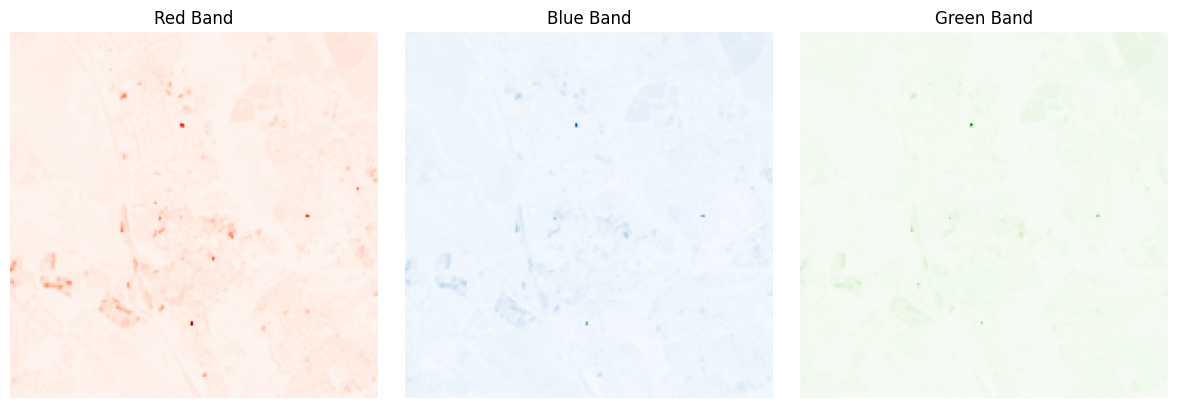

In [2]:
oxford_np = oxford.read()
data_min = oxford_np.min()
data_max = oxford_np.max()

# Normalize to [0, 1] 
normalized_data = ((oxford_np - data_min) / (data_max - data_min)) 

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
cmaps = ["Reds", "Blues", "Greens"]
bands = ["Red Band", "Blue Band", "Green Band"]
for band in [3, 2, 1]:
    ax[band-1].imshow(normalized_data[band, :, :], cmap=cmaps[band-1])
    ax[band-1].set_title(bands[band-1])
    ax[band-1].axis("off")
plt.tight_layout();

In [3]:
def scale_to_8bit(image, lower_percent=1, upper_percent=99):
    # Calculate the percentiles to stretch
    min_val = np.percentile(image, lower_percent)
    max_val = np.percentile(image, upper_percent)

    # Apply the linear stretch
    stretched_img = np.clip(image, min_val, max_val)

    # Scale values to 0-255
    scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
    scaled_img = scaled_img.astype(np.uint8)  # Convert to 8-bit values

    return scaled_img

def visualize(imagery):
    red_band = imagery.read(4)
    green_band = imagery.read(3)
    blue_band = imagery.read(2)

    scaled_red = scale_to_8bit(red_band)
    scaled_green = scale_to_8bit(green_band)
    scaled_blue = scale_to_8bit(blue_band)

    # Combine the scaled bands into a single RGB image
    rgb_image = np.stack((scaled_red, scaled_green, scaled_blue), axis=-1)

    plt.figure(figsize=(5, 5))
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("All bands")

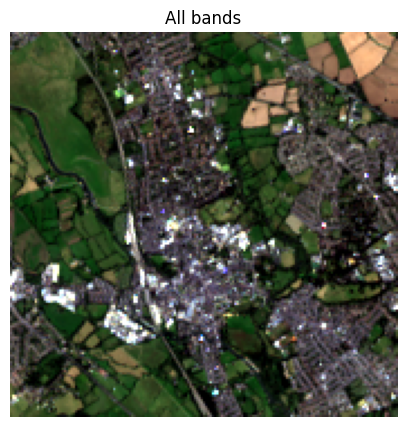

In [4]:
visualize(oxford)

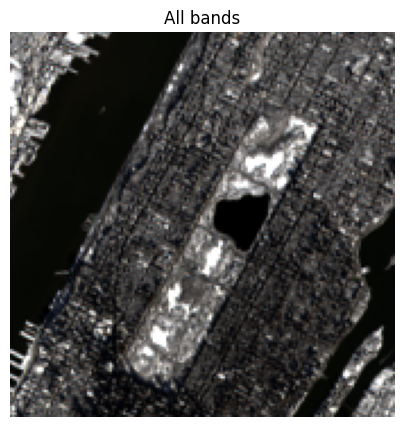

In [5]:
visualize(central_park)